In [1]:
%matplotlib inline

# Análise de Comics Digitais (Python) - Marvel ou DC?

## Introdução

Depois de ter feito a análise do site ([post aqui](http://felipegalvao.com.br/blog/2016/05/01/comixology-analise-de-quadrinhos-digitais-parte-1-analise-do-site-para-web-scraping/)) e de ter feito um scraping dos dados do site da Comixology ([post aqui](http://felipegalvao.com.br/blog/2016/05/24/web-scraping-com-python-comics-digitais-do-comixology/)), agora vamos fazer uma bela análise de dados das informações de comics digitais com Python (Pandas).

Vamos descobrir quais editoras tem os melhores preços relativos à quantidade de páginas de seus comics, as editoras com as melhores avaliações médias, além de uma análise mais profunda do duelo das gigantes: Marvel x DC Comics. Vamos começar.

## Preparação Inicial

Primeiro, como de costume, vamos importar os pacotes que iremos utilizar. O pacote warnings, serve somente para desligar possíveis avisos relativos à este código no notebook, para que o código não fique extenso. Os outros pacotes já são velhos conhecidos: numpy, pandas, matplotlib e seaborn.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

comixology_df = pd.read_csv("comixology_comics_dataset_19.04.2016.csv", encoding = "ISO-8859-1")

Agora, vamos criar uma coluna de preço por página. Desta forma, podemos comparar preços de uma forma mais adequada, visto que o preço de um comic pode variar muito de acordo com suas páginas.

Para alguns comics, a informação de quantidade de páginas não existe, e desta forma, estes retornam um valor de infinito (inf) ao fazer o cálculo. Para estes, vamos definir seu valor como NaN:

In [3]:
# Vamos criar uma coluna de preço por página para futuras análises
comixology_df['Price_per_page'] = pd.Series(comixology_df['Original_price'] / 
                                            comixology_df['Page Count'], 
                                            index=comixology_df.index)
                                            
# Como alguns comics estão com a contagem de páginas igual a zero, vamos 
# definir para estes o Price_per_page igual a NaN
comixology_df.Price_per_page[comixology_df['Price_per_page'] == np.inf] = np.nan

Vamos agora usar a função iterrows() do Dataframe para extrair o ano de publicação da versão impressa do comic. Esta função cria uma espécie de forloop, que itera sobre cada linha do DataFrame. Vamos usar o split para dividir a string que contém a data de publicação em uma lista. O terceiro valor será o ano. Em alguns casos, o ano retorna um valor maior que 2016. Como isto é impossível, estes valores também serão definidos como NaN:

In [4]:
# Vamos extrair o ano da string de data de publicação da versão impressa
print_dates = []
for index, row in comixology_df.iterrows():
    if type(comixology_df.ix[index]['Print Release Date']) == float:
        row_year = np.nan
    else:        
        row_year = int(comixology_df.ix[index]['Print Release Date'].split()[2])
        if row_year > 2016:
            row_year = np.nan
    print_dates.append(row_year)

comixology_df['Print_Release_Year'] = pd.Series(print_dates, 
                                                index=comixology_df.index)

## Para as análises (e avante)

A primeira análise que faremos será o cálculo dos valores médios do site em geral, como preço médio dos comics, quantidade média de páginas, entre outros. Usaremos a função nanmean() do numpy, que calcula a média excluindo os NaN, que é quando não possuímos a informação.

In [5]:
# Algumas informações médias do site
average_price = np.nanmean(comixology_df['Original_price'])
average_page_count = np.nanmean(comixology_df['Page Count'])
average_rating = np.nanmean(comixology_df['Rating'])
average_rating_quantity = np.nanmean(comixology_df['Ratings_Quantity'])
average_price_per_page = np.nanmean(comixology_df['Price_per_page'])

print("Preço médio: " + str(average_price))
print("Quantidade média de páginas: " + str(average_page_count))
print("Avaliação média: " + str(average_rating))
print("Quantidade média de avaliações por comic: " + 
      str(average_rating_quantity))
print("Preço por página médio por comic: " + str(average_price_per_page))

Preço médio: 3.69789045383
Quantidade média de páginas: 51.5862786864
Avaliação média: 4.26347617558
Quantidade média de avaliações por comic: 51.5088270335
Preço por página médio por comic: 0.0805173472536


Agora, definiremos o número máximo de colunas de cada campo para impressão da tabela em 40 colunas. Faremos isto pois o nome de alguns comics é bastante extenso, e a impressão da tabela ficaria bem esquisita. Desta forma, pelo menos conseguimos ver algumas informações a mais.

Depois vamos listar as comics que possuem 5 estrelas, possuem mais de 20 avaliações (para captar apenas as mais representativas; comics com 5 de avaliação média mas que possuam apenas uma avaliação podem não ser uma métrica muito boa) e vamos ordena-las por preço por página. No topo teremos algumas comics que são gratuitas (as 6 primeiras). Depois, temos ótimas comics, na visão dos usuários, com um preço por página bem atrativo.

In [6]:
# Definir o número de colunas para impressão de tabelas
pd.set_option('display.max_colwidth', 40)

In [7]:
# Vamos listar as comics com rating 5 estrelas que possuam pelo menos 20 ratings 
# e ordena-las por preço por página
comics_with_5_stars = comixology_df[comixology_df.Rating == 5]
comics_with_5_stars = comics_with_5_stars[comics_with_5_stars.
                                          Ratings_Quantity > 20]
print(comics_with_5_stars[['Name','Publisher','Price_per_page']].
      sort_values(by='Price_per_page'))

                                          Name                     Publisher  \
44099               Left 4 Dead: The Sacrifice                         Valve   
6143                      Looking For Group #1                 Blind Ferret    
55253                      The Walking Dead #1              Image - Skybound   
30295  FCBD 2014: Don Rosa's Uncle Scrooge ...                 Fantagraphics   
8762                   Mother Russia #1 (of 3)  Alterna Comics - FUBAR Press   
80022  Scott Pilgrim Vol. 1: Scott Pilgrim'...                     Oni Press   
50270       Transformers: The Cover Collection                           IDW   
42749                        American Elf 2001         Top Shelf Productions   
42748                        American Elf 2000         Top Shelf Productions   
7677           Cerebus Vol. 2 #2: High Society             Aardvark-Vanaheim   
81547                     Heart of a Corpse #2                           SLG   
7679           Cerebus Vol. 2 #4: High S

Na próxima análise, usaremos apenas comics com mais de 5 avaliações. Para isso, vamos filtrar:

In [8]:
# Para a próxima análise, usaremos somente comics com mais de 5 ratings
comics_more_than_5_ratings = comixology_df[comixology_df.Ratings_Quantity > 5]

Vamos criar uma pivot table do Pandas, para visualizarmos a quantidade de comics com avaliação e a avaliação média deste Publisher. Depois vamos considerar como Publishers representativas aquelas que possuem pelo menos 20 comics com avaliações. Para isso faremos o filtro da pivot table. Depois, vamos ordenar esta tabela filtrada por avaliação média, em ordem decrescente. Ou seja, as primeiras Publishers são consideradas as que possuem a melhor avaliação média de seus comics. Repare que as gigantes DC Comics e Marvel ficam razoavelmente para baixo da lista.

In [9]:
# Criar pivot table com média das avaliações por Publisher
publishers_avg_rating = pd.pivot_table(comics_more_than_5_ratings, 
                                       values=['Rating'], 
                                       index=['Publisher'], 
                                       aggfunc=[np.mean, np.count_nonzero])

In [10]:
# Primeiramente vamos avaliar qualquer publisher que tenha mais de 20 comics 
# com avaliações
main_pub_avg_rating = publishers_avg_rating[publishers_avg_rating.
                                            count_nonzero.Rating > 20]
main_pub_avg_rating = main_pub_avg_rating.sort_values(by=('mean','Rating'), 
                                                      ascending=False)
print(main_pub_avg_rating)

                                        mean count_nonzero
                                      Rating        Rating
Publisher                                                 
Cartoon Books                       4.875000          80.0
Aardvark-Vanaheim                   4.800000          25.0
Abstract Studio                     4.786517          89.0
BOOM! - BOOM! Box                   4.763889          72.0
Archie                              4.711656         326.0
Icon                                4.585859         198.0
Evil Twin Comics                    4.565217          23.0
Udon                                4.561798          89.0
MAX                                 4.546911         437.0
Fantagraphics                       4.518182         110.0
Image - Skybound                    4.504092         611.0
ComixTribe                          4.500000          32.0
Kodansha                            4.487179          39.0
Delcourt                            4.463415          41

Para ajudar na visão, um gráfico em matplotlib que representa a tabela acima:

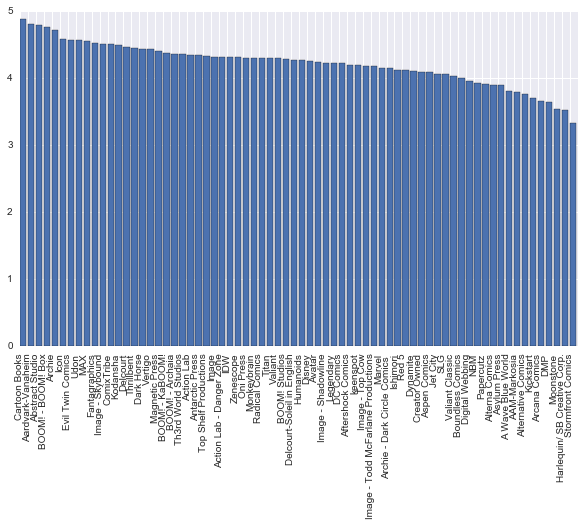

In [11]:
# Agora, um gráfico com a avaliação média de cada editora
y_axis = main_pub_avg_rating['mean']['Rating']
x_axis = range(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, tuple(main_pub_avg_rating.index),rotation=90)
plt.show()

Para simplificar um pouco e ter uma tabela e gráfico mais fáceis de visualizar, vamos considerar agora comics que possuem pelo menos 300 comics com avaliações. Logo abaixo, o gráfico que representa a tabela (menos poluído e permitindo uma visão melhor da situação das publishers)

In [12]:
# E agora vamos ver as bem grandes, com mais de 300 comics com avaliações
big_pub_avg_rating = publishers_avg_rating[publishers_avg_rating.
                                           count_nonzero.Rating > 300]
big_pub_avg_rating = big_pub_avg_rating.sort_values(by=('mean','Rating'), 
                                                    ascending=False)
print(big_pub_avg_rating)

                                        mean count_nonzero
                                      Rating        Rating
Publisher                                                 
Archie                              4.711656         326.0
MAX                                 4.546911         437.0
Image - Skybound                    4.504092         611.0
Dark Horse                          4.440000         550.0
Vertigo                             4.435793        2453.0
Image                               4.316908        3105.0
IDW                                 4.313492        2772.0
Zenescope                           4.309711         381.0
Oni Press                           4.305376         465.0
Valiant                             4.291022         323.0
BOOM! Studios                       4.277219        1194.0
Avatar                              4.234672         473.0
DC Comics                           4.218644       13012.0
Image - Top Cow                     4.176545         793

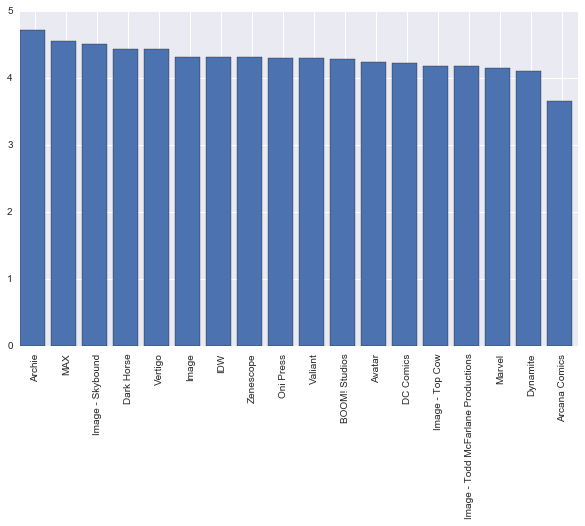

In [13]:
# E agora, o mesmo gráfico com a avaliação média das grandes editoras
y_axis = big_pub_avg_rating['mean']['Rating']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.5, tuple(big_pub_avg_rating.index), rotation=90)
plt.show()

Uma coisa que eu acreditava que fosse legal de conferir era se a classificação etária faz alguma diferença na avaliação que os usuários dão a cada comic. Será que comics voltados para o público adulto possuem avaliações melhores? Ou ao contrário? Vamos checar fazendo uma nova pivot table:

In [14]:
# Vamos ver agora se a classificação etária faz alguma diferença significativa 
# nas avaliações
rating_by_age = pd.pivot_table(comics_more_than_5_ratings, 
                               values=['Rating'], 
                               index=['Age Rating'], 
                               aggfunc=[np.mean, np.count_nonzero])
                               
print(rating_by_age)

                mean count_nonzero
              Rating        Rating
Age Rating                        
12+ Only    4.185380       28304.0
15+ Only    4.218854        4487.0
17+ Only    4.341259        9925.0
18+ Only    4.143939         264.0
9+ Only     4.360186        1502.0
All Ages    4.395935        1230.0


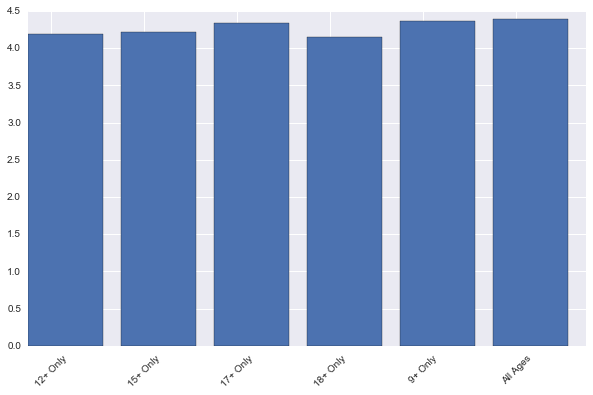

In [15]:
# Gráfico de barras com a avaliação média por faixa etária
y_axis = rating_by_age['mean']['Rating']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.25, tuple(rating_by_age.index), rotation=45)
plt.show()

Como podemos perceber, as barras do gráfico ficam com alturas bem próximas. Ao que parece, a classificação etária não afeta muito significativamente a avaliação dos comics. Se formos analisar apenas matematicamente, as comics liberadas para qualquer idade ou para maiores de 9 anos possuem as melhores avaliações.

Nosso próximo passo é ver como, de certa forma, evoluiu o número de lançamentos de quadrinhos (considerando as versões impressas) ao longo dos anos.  Lembrando que já criamos a coluna com o ano de lançamento da versão impressa de um comic. O próximo passo é basicamente contar a quantidade de cada ano nesta coluna que criamos. Vamos fazer uma lista com os anos de lançamento passados para inteiros para que o eixo do gráfico faça a leitura correta:

In [16]:
# Cria tabela com a quantidade de quadrinhos lançados por ano, baseado na data 
# de lançamento da versão impressa
print_releases_per_year = pd.pivot_table(comixology_df, 
                                         values=['Name'], 
                                         index=['Print_Release_Year'], 
                                         aggfunc=[np.count_nonzero])
print_years = []
for index, row in print_releases_per_year.iterrows():    
    print_year = int(index)
    print_years.append(print_year)
print_releases_per_year.index = print_years
print(print_releases_per_year)

     count_nonzero
              Name
1900            14
1938             1
1939             6
1940             7
1941            21
1942            22
1943            18
1944            13
1945            13
1946            15
1947             4
1948            11
1949            14
1950             7
1951             2
1952             4
1953             3
1954             6
1955             9
1956             8
1957             9
1958             6
1959            13
1960            17
1961            29
1962            45
1963            74
1964            71
1965            58
1966            63
...            ...
1987           243
1988           281
1989           248
1990           302
1991           353
1992           402
1993           537
1994           630
1995           599
1996           499
1997           605
1998           664
1999           727
2000           771
2001           676
2002           714
2003           876
2004          1151
2005          1365
2006        

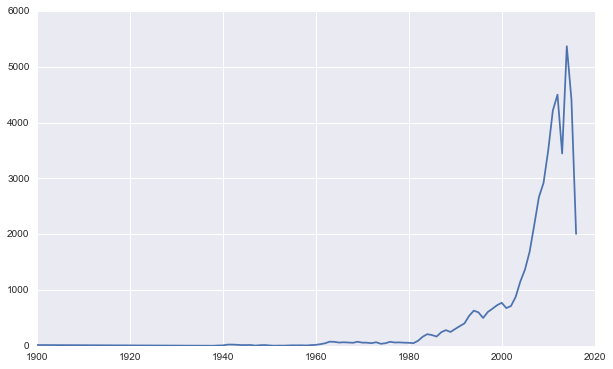

In [17]:
y_axis = print_releases_per_year['count_nonzero']['Name']
x_axis = print_releases_per_year['count_nonzero']['Name'].index
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis)
plt.show()

Os números mostram que o crescimento era moderado, até que na década de 2000 ocorreu um boom, com um crescimento bastante considerável até 2012, quando a quantidade de lançamentos começou a oscilar. A queda mostrada no ano de 2016 ocorre, obviamente, pois ainda estamos na metade do mesmo.

Agora, para fazer uma avaliação dos comics mais baixados no site (não dá para aferir os mais comprados, visto que alguns dos comics são gratuitos). Para esta análise, vamos ver quais são os 30 comics com mais avaliações.

In [18]:
# Vejamos agora as 30 comics com mais avaliações; se for mantida a proporção, 
# pode-se dizer que estas são as comics mais baixadas (e não vendidas, pois 
# algumas destas são gratuitas)
comics_by_ratings_quantity = comixology_df[['Name','Publisher',
                                            'Ratings_Quantity']].sort_values(
                                            by='Ratings_Quantity', 
                                            ascending=False)
print(comics_by_ratings_quantity.head(30))

                                          Name         Publisher  \
55253                      The Walking Dead #1  Image - Skybound   
41479    Arrow (2012-2013) #1: Special Edition         DC Comics   
53325                                  Saga #1             Image   
11898                                 Bane 101         DC Comics   
16638       Injustice: Gods Among Us (2013) #1         DC Comics   
12709                        Batman (2011-) #1         DC Comics   
17286                Justice League (2011-) #1         DC Comics   
55228   The Walking Dead Vol. 1: Days Gone Bye  Image - Skybound   
19435     Batman: Night of the Owls Booklet #1         DC Comics   
549    Batman Black & White: A Black and Wh...         DC Comics   
231                                 Batman 101         DC Comics   
2246                         Blackest Night #0         DC Comics   
61309       Amazing Spider-Man (1999-2013) #36            Marvel   
49490          Teenage Mutant Ninja Turtles #1  

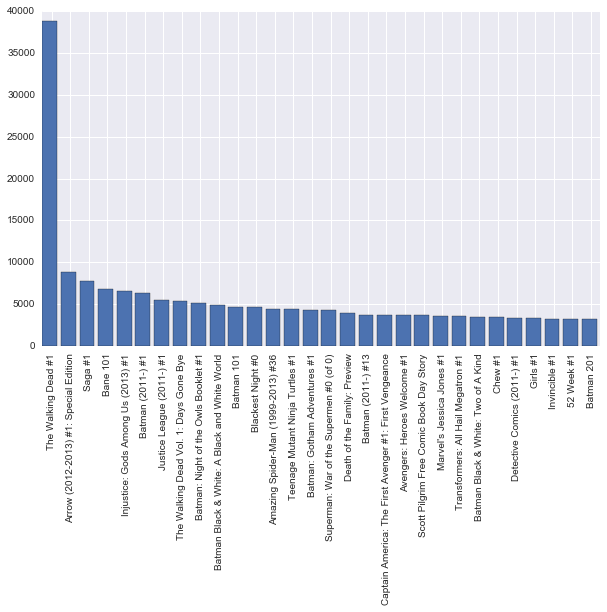

In [19]:
y_axis = comics_by_ratings_quantity.head(30)['Ratings_Quantity']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.5, tuple(comics_by_ratings_quantity.head(30)['Name']), 
           rotation=90)
plt.show()

Walking Dead liderando com (muuuita) folga. Depois, algumas comics de Marvel e DC e mais alguns comics variados.

Agora, vamos fazer uma análise mais profunda dos comics das gigantes: Marvel e DC Comics.

Primeiro, vamos filtrar o DataFrame para que sobrem apenas comics destas duas. Depois, vamos calcular através da função pivot table alguns valores médios das duas:

In [20]:
# Vamos agora ver dados somente das duas maiores: Marvel e DC
marvel_dc_comics = comixology_df[(comixology_df.Publisher == 'Marvel') | 
                                 (comixology_df.Publisher == 'DC Comics')]
 
# Primeiro, alguns valores médios de cada uma                                
marvel_dc_pivot_averages = pd.pivot_table(marvel_dc_comics, 
                               values=['Rating','Original_price','Page Count',
                                       'Price_per_page'], 
                               index=['Publisher'], 
                               aggfunc=[np.mean])
print(marvel_dc_pivot_averages)

                    mean                                    
          Original_price Page Count Price_per_page    Rating
Publisher                                                   
DC Comics       2.600034  35.318463       0.078356  4.233034
Marvel          3.398555  41.344295       0.090946  4.191335


Como vemos, a DC possui um preço médio e preço por página menor, enquanto possui uma avaliação média levemente maior. A quantidade média de páginas nos comics da Marvel é um pouco maior. Abaixo, os gráficos de barra representando cada uma destas comparações:

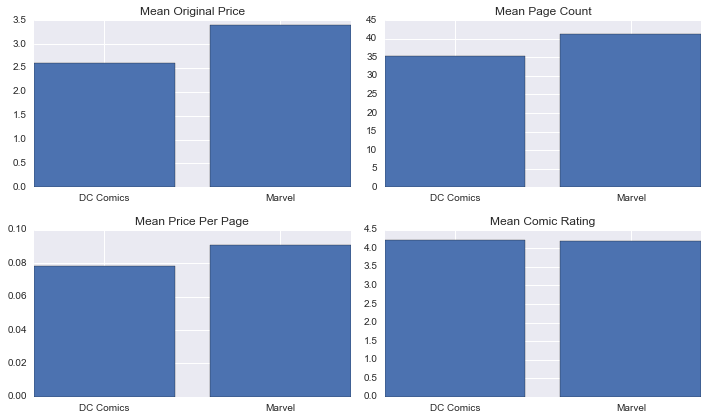

In [21]:
plt.figure(1,figsize=(10, 6))

plt.subplot(221) # Mean original price
y_axis = marvel_dc_pivot_averages['mean']['Original_price']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Original_price']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, 
           tuple(marvel_dc_pivot_averages['mean']['Original_price'].index))
plt.title('Mean Original Price')
plt.tight_layout()

plt.subplot(222) # Mean page count
y_axis = marvel_dc_pivot_averages['mean']['Page Count']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Page Count']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, 
           tuple(marvel_dc_pivot_averages['mean']['Page Count'].index))
plt.title('Mean Page Count')
plt.tight_layout()

plt.subplot(223) # Mean Price Per Page
y_axis = marvel_dc_pivot_averages['mean']['Price_per_page']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Price_per_page']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, 
           tuple(marvel_dc_pivot_averages['mean']['Price_per_page'].index))
plt.title('Mean Price Per Page')
plt.tight_layout()

plt.subplot(224) # Mean Comic Rating
y_axis = marvel_dc_pivot_averages['mean']['Rating']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Rating']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, 
           tuple(marvel_dc_pivot_averages['mean']['Rating'].index))
plt.title('Mean Comic Rating')
plt.tight_layout()

plt.show()

O próximo passo é ver alguns números relativos a quantidade de comics de cada uma. Quantos comics cada uma possui, qual o número de comics bons (avaliação 4 ou 5) e ruins (avaliação 1 ou 2) e sua proporção perante o número total de comics. Para fazer esta análise, vamos meramente fazer alguns filtros e verificar o comprimento do DataFrame após estes filtros. Simples:

In [22]:
# Vamos agora verificar a quantidade de comics de cada uma e fazer uma proporção
# com a quantidade de comics de cada uma com rating maior ou igual a 4. Desta 
# forma podemos ver qual delas, proporcionalmente, lança bons comics
marvel_total = len(marvel_dc_comics[marvel_dc_comics['Publisher'] == 'Marvel'])
marvel_4_or_5 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'Marvel')
                                     & (marvel_dc_comics['Rating'] >= 4)])
marvel_proportion_4_or_5 = marvel_4_or_5 / marvel_total
marvel_1_or_2 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'Marvel') 
                                     & (marvel_dc_comics['Rating'] <= 2)])
marvel_proportion_1_or_2 = marvel_1_or_2 / marvel_total

dc_total = len(marvel_dc_comics[marvel_dc_comics['Publisher'] == 'DC Comics'])
dc_4_or_5 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'DC Comics')
                                 & (marvel_dc_comics['Rating'] >= 4)])
dc_proportion_4_or_5 = dc_4_or_5 / dc_total
dc_1_or_2 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'DC Comics') 
                                 & (marvel_dc_comics['Rating'] <= 2)])
dc_proportion_1_or_2 = dc_1_or_2 / dc_total

print("\n")
print("Total de Comics Marvel: " + str(marvel_total))
print("Total de Comics Marvel com avaliação maior ou igual a 4: " + 
      str(marvel_4_or_5))
print("Proporção de Comics Marvel com avaliação maior ou igual a 4: " + 
      str("{0:.2f}%".format(marvel_proportion_4_or_5 * 100)))
print("Total de Comics Marvel com avaliação menor ou igual a 2: " + 
      str(marvel_1_or_2))
print("Proporção de Comics Marvel com avaliação menor ou igual a 2: " + 
      str("{0:.2f}%".format(marvel_proportion_1_or_2 * 100)))
print("\n")
print("Total de Comics DC Comics: " + str(dc_total))
print("Total de Comics DC Comics com avaliação maior ou igual a 4: " + 
      str(dc_4_or_5))
print("Proporção de Comics DC Comics com avaliação maior ou igual a 4: " + 
      str("{0:.2f}%".format(dc_proportion_4_or_5 * 100)))
print("Total de Comics DC Comics com avaliação menor ou igual a 2: " + 
      str(dc_1_or_2))
print("Proporção de Comics DC Comics com avaliação menor ou igual a 2: " + 
      str("{0:.2f}%".format(dc_proportion_1_or_2 * 100)))
print("\n")



Total de Comics Marvel: 18063
Total de Comics Marvel com avaliação maior ou igual a 4: 14791
Proporção de Comics Marvel com avaliação maior ou igual a 4: 81.89%
Total de Comics Marvel com avaliação menor ou igual a 2: 95
Proporção de Comics Marvel com avaliação menor ou igual a 2: 0.53%


Total de Comics DC Comics: 17440
Total de Comics DC Comics com avaliação maior ou igual a 4: 15986
Proporção de Comics DC Comics com avaliação maior ou igual a 4: 91.66%
Total de Comics DC Comics com avaliação menor ou igual a 2: 62
Proporção de Comics DC Comics com avaliação menor ou igual a 2: 0.36%




Novamente, aqui, a DC Comics se mostra um pouquinho melhor. Tem uma maior proporção de comics bons e uma menor proporção de comics ruins. Ponto para a DC de novo. Abaixo, o gráfico fazendo as comparações:

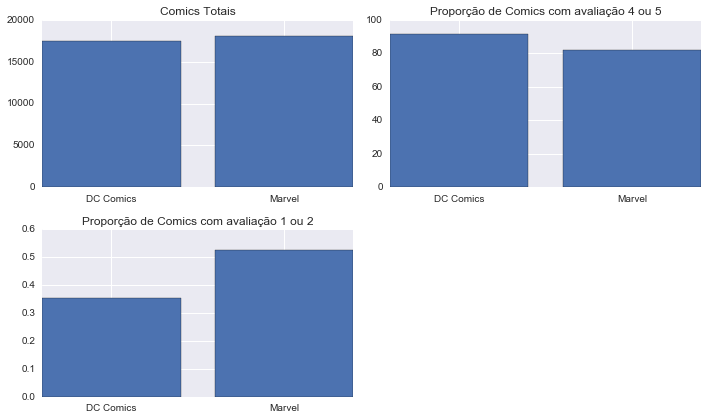

In [23]:
plt.figure(2,figsize=(10, 6))

plt.subplot(221) # Total de Comics de cada editora
y_axis = [dc_total, marvel_total]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Comics Totais')
plt.tight_layout()

plt.subplot(222) # Proporção de Comics com avaliação 4 ou 5
y_axis = [dc_proportion_4_or_5 * 100, marvel_proportion_4_or_5 * 100]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Proporção de Comics com avaliação 4 ou 5')
plt.tight_layout()

plt.subplot(223) # Proporção de Comics com avaliação 1 ou 2
y_axis = [dc_proportion_1_or_2 * 100, marvel_proportion_1_or_2 * 100]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Proporção de Comics com avaliação 1 ou 2')
plt.tight_layout()

plt.show()

Apenas como curiosidade, vamos verificar o número de avaliações dadas em comics de cada uma, através de mais uma pivot table:

In [24]:
# Somar a quantidade de avaliações em comics de cada editora
marvel_dc_pivot_sums = pd.pivot_table(marvel_dc_comics, 
                               values=['Ratings_Quantity'], 
                               index=['Publisher'], 
                               aggfunc=[np.sum])
print(marvel_dc_pivot_sums)

                       sum
          Ratings_Quantity
Publisher                 
DC Comics          1725344
Marvel             1099324


Interessante notar que mesmo a Marvel tendo uma quantidade maior de comics, como vimos na tabela anterior, a quantidade de avaliações em comics da DC é bem maior, cerca de 55% a mais. Parece que os fãs dos comics da DC são mais propensos a avaliar os comics na Comixology que os da Marvel.

Nossa próxima avaliação será a de personagens e equipes de heróis / vilões. Primeiramente, vamos criar listas com personagens de cada uma, e igualmente para times. Dividi os personagens entre as Publishers e criei as listas na mão. Deu um trabalhinho, mas nada demais.

In [25]:
main_dc_characters = ['Superman','Batman','Aquaman','Wonder Woman', 'Flash', 
                      'Robin','Arrow', 'Batgirl', 'Bane', 'Harley Queen', 
                      'Poison Ivy', 'Joker','Firestorm','Vixen',
                      'Martian Manhunter','Zod','Penguin','Lex Luthor',
                      'Green Lantern','Supergirl','Atom','Cyborg','Hawkgirl',
                      'Starfire','Jonah Hex','Booster Gold','Black Canary',
                      'Shazam','Catwoman','Nightwing','Zatanna','Hawkman',
                      'Power Girl','Rorschach','Doctor Manhattan',
                      'Blue Beetle','Batwoman','Darkseid','Vandal Savage', 
                      "Ra's Al Ghul",'Riddler','Reverse Flash','Black Adam',
                      'Deathstroke','Brainiac','Sinestro','Two-Face']
                      
main_marvel_characters = ['Spider-Man','Captain Marvel','Hulk','Thor',
                          'Iron Man','Luke Cage','Black Widow','Daredevil',
                          'Captain America','Jessica Jones','Ghost Rider',
                          'Spider-Woman','Silver Surfer','Beast','Thing',
                          'Kitty Pride','Doctor Strange','Black Panther',
                          'Invisible Woman','Nick Fury','Storm','Professor X',
                          'Cyclops','Jean Grey','Wolverine','Scarlet Witch',
                          'Gambit','Rogue','X-23','Iceman','She-Hulk',
                          'Iron Fist','Hawkeye','Quicksilver','Vision',
                          'Ant-Man','Cable','Bishop','Colossus','Deadpool',
                          'Human Torch','Mr. Fantastic','Nightcrawler','Nova',
                          'Psylocke','Punisher','Rocket Raccoon','Groot',
                          'Star-Lord','War Machine','Gamora','Drax','Venom',
                          'Carnage','Octopus','Green Goblin','Abomination',
                          'Enchantress','Sentinel','Viper','Lady Deathstrike',
                          'Annihilus','Ultron','Galactus','Kang','Bullseye',
                          'Juggernaut','Sabretooth','Mystique','Kingpin',
                          'Apocalypse','Thanos','Dark Phoenix','Loki',
                          'Red Skull','Magneto','Doctor Doom','Ronan']
                          
dc_teams = ['Justice League','Teen Titans','Justice Society','Lantern Corps',
            'Legion of Super-Heroes','All-Star Squadron','Suicide Squad',
            'Birds of Prey','Gen13', 'The League of Extraordinary Gentlemen',
            'Watchmen']
            
marvel_teams = ['X-Men','Avengers','Fantastic Four','Asgardian Gods','Skrulls',
                'S.H.I.E.L.D.','Inhumans','A.I.M.','X-Factor','X-Force',
                'Defenders','New Mutants','Brotherhood of Evil Mutants',
                'Thunderbolts', 'Alpha Flight','Guardians of the Galaxy',
                'Nova Corps','Illuminati']

Agora, vamos passar por cada nome de personagem e time. Primeiramente, vamos definir um DataFrame, e faremos um filtro nos nomes das comics que possuem o nome deste personagem ou time. Depois, vamos extrair algumas informações daí. A quantidade de comics será basicamente o número de linhas do DataFrame, obtido através da função len(). Depois, as médias de avaliação, preço e quantidade de páginas. Cada uma destas informações será salva em um dictionary, que será adicionado a uma lista. No fim, teremos uma lista de dicts para os personagens e uma lista de dicts para os times:

In [26]:
character_row = {}
characters_dicts = []

for character in main_dc_characters:
    character_df = comixology_df[(comixology_df['Name'].str.contains(character)) & 
                                 (comixology_df['Publisher'] == 'DC Comics')]
    character_row['Character_Name'] = character
    character_row['Quantity_of_comics'] = len(character_df)
    character_row['Average_Rating'] = np.nanmean(character_df['Rating'])
    character_row['Average_Price'] = np.nanmean(character_df['Original_price'])
    character_row['Average_Pages'] = np.nanmean(character_df['Page Count'])
    character_row['Publisher'] = "DC Comics"
    characters_dicts.append(character_row)
    character_row = {}
    
for character in main_marvel_characters:
    character_df = comixology_df[(comixology_df['Name'].str.contains(character)) & 
                                 (comixology_df['Publisher'] == 'Marvel')]
    character_row['Character_Name'] = character
    character_row['Quantity_of_comics'] = len(character_df)
    character_row['Average_Rating'] = np.nanmean(character_df['Rating'])
    character_row['Average_Price'] = np.nanmean(character_df['Original_price'])
    character_row['Average_Pages'] = np.nanmean(character_df['Page Count'])
    character_row['Publisher'] = "Marvel"
    characters_dicts.append(character_row)
    character_row = {}
    
characters_df = pd.DataFrame(characters_dicts)

In [27]:
team_row = {}
teams_dicts = []

for team in dc_teams:
    team_df = comixology_df[(comixology_df['Name'].str.contains(team)) & 
                                 (comixology_df['Publisher'] == 'DC Comics')]
    team_row['Team_Name'] = team
    team_row['Quantity_of_comics'] = len(team_df)
    team_row['Average_Rating'] = np.nanmean(team_df['Rating'])
    team_row['Average_Price'] = np.nanmean(team_df['Original_price'])
    team_row['Average_Pages'] = np.nanmean(team_df['Page Count'])
    team_row['Publisher'] = "DC Comics"
    teams_dicts.append(team_row)
    team_row = {}
    
for team in marvel_teams:
    team_df = comixology_df[(comixology_df['Name'].str.contains(team)) & 
                                 (comixology_df['Publisher'] == 'Marvel')]
    team_row['Team_Name'] = team
    team_row['Quantity_of_comics'] = len(team_df)
    team_row['Average_Rating'] = np.nanmean(team_df['Rating'])
    team_row['Average_Price'] = np.nanmean(team_df['Original_price'])
    team_row['Average_Pages'] = np.nanmean(team_df['Page Count'])
    team_row['Publisher'] = "Marvel"
    teams_dicts.append(team_row)
    team_row = {}
    
teams_df = pd.DataFrame(teams_dicts)

Vamos considerar apenas times e personagens que possuam mais de 20 comics onde seu nome está no título do comic.

In [28]:
teams_df = teams_df[teams_df['Quantity_of_comics'] > 20]
characters_df = characters_df[characters_df['Quantity_of_comics'] > 20]

Vamos agora verificar os maiores times e personagens em número de comics e avaliação média. Para os personagens, mesmo considerando aqueles com mais de 20 comics, ainda sobra muita coisa. Desta forma, vamos limitar a quantidade de personagens a 20, para que a lista e o gráfico não fiquem muito extensos. Depois vamos imprimir cada uma das tabelas.

In [29]:
# Limitando a 20 o número de personagens
top_characters_by_quantity = characters_df.sort_values(by='Quantity_of_comics',
                                         ascending=False)[['Character_Name',
                                         'Average_Rating',
                                         'Quantity_of_comics']].head(20)
top_characters_by_rating = characters_df.sort_values(by='Average_Rating',
                                         ascending=False)[['Character_Name',
                                         'Average_Rating',
                                         'Quantity_of_comics']].head(20)

top_teams_by_quantity = teams_df.sort_values(by='Quantity_of_comics', 
                                             ascending=False)[['Team_Name',
                                             'Average_Rating',
                                             'Quantity_of_comics']]
top_teams_by_rating = teams_df.sort_values(by='Average_Rating', 
                                           ascending=False)[['Team_Name',
                                           'Average_Rating',
                                           'Quantity_of_comics']]

print(top_characters_by_quantity)

     Character_Name  Average_Rating  Quantity_of_comics
1            Batman        4.218568                2459
47       Spider-Man        4.335099                1680
0          Superman        4.197286                1043
55  Captain America        3.949602                 831
51         Iron Man        4.083821                 744
49             Hulk        4.098540                 707
18    Green Lantern        4.132159                 694
71        Wolverine        4.122517                 631
4             Flash        4.206271                 616
3      Wonder Woman        4.313629                 615
50             Thor        4.251244                 597
54        Daredevil        4.306867                 529
86         Deadpool        4.319018                 504
5             Robin        4.308235                 429
6             Arrow        4.223214                 341
19        Supergirl        4.205036                 296
28         Catwoman        3.920635             

Entre os personagens, temos o Batman com o maior número de comics, seguido pelo Homem-Aranha e, bem atrás o Superman completando o top 3. Depois temos uma série de outros heróis famosos, como Capitão América, Homem de Ferro, Wolverine, Flash, entre outros. Aqui, nada de muito surpreendente.

In [30]:
print(top_characters_by_rating)

        Character_Name  Average_Rating  Quantity_of_comics
115           Mystique        4.666667                  27
25        Booster Gold        4.633803                  83
24           Jonah Hex        4.632911                  84
14   Martian Manhunter        4.611111                  55
35         Blue Beetle        4.542373                  59
59       Silver Surfer        4.468750                  82
64       Black Panther        4.418033                 150
52           Luke Cage        4.388889                  29
83               Cable        4.361111                 144
81              Vision        4.352941                  56
92            Punisher        4.351852                 164
78           Iron Fist        4.348624                 114
96         War Machine        4.347826                  29
69             Cyclops        4.346154                  27
20                Atom        4.336735                 119
47          Spider-Man        4.335099                16

Aqui temos uma surpresa na liderança. Mesmo com a quantidade de comics não sendo tão grande, acho difícil que alguém previsse que a Mystique seria o personagem com a avaliação média mais alta no meio destes personagens todos, tão mais populares. Nas primeiras posições, outros resultados surpreendentes, com Booster Gold em segundo, Jonah Hex em terceiro, Blue Beetle em quinto. Dos super populares que vimos na lista de cima, temos o Spider-Man, Deadpool e Wonder Woman, já no fim da lista do top 20.

In [31]:
print(top_teams_by_quantity)

                  Team_Name  Average_Rating  Quantity_of_comics
11                    X-Men        4.117677                2025
12                 Avengers        4.063710                1721
0            Justice League        4.190608                 744
13           Fantastic Four        4.469671                 632
1               Teen Titans        4.341518                 457
4    Legion of Super-Heroes        4.268966                 326
19                 X-Factor        4.253521                 224
7             Birds of Prey        4.167513                 198
20                  X-Force        4.240838                 193
6             Suicide Squad        4.006329                 159
26  Guardians of the Galaxy        4.132812                 143
3             Lantern Corps        4.125926                 136
22              New Mutants        4.095238                 130
24             Thunderbolts        4.431193                 127
16             S.H.I.E.L.D.        4.053

Entre os times com mais comics, nada de muito surpreendente também. Os eternos X-Men em primeiro, Avengers em segundo e Justice League em terceiro. Depois, seguem os outros times menos populares.

In [32]:
print(top_teams_by_rating)

                  Team_Name  Average_Rating  Quantity_of_comics
5         All-Star Squadron        4.500000                  50
13           Fantastic Four        4.469671                 632
24             Thunderbolts        4.431193                 127
10                 Watchmen        4.345455                  55
1               Teen Titans        4.341518                 457
4    Legion of Super-Heroes        4.268966                 326
19                 X-Factor        4.253521                 224
17                 Inhumans        4.245902                  69
20                  X-Force        4.240838                 193
0            Justice League        4.190608                 744
8                     Gen13        4.175000                  40
7             Birds of Prey        4.167513                 198
2           Justice Society        4.142857                  77
26  Guardians of the Galaxy        4.132812                 143
3             Lantern Corps        4.125

Nas avaliações, o top 3 é formado pelo All-Star Squadron, da DC, Fantastic Four e Thunderbolts, da Marvel. Surpreendentemente, X-Men, Avengers e o Suicide Squad (cujo filme está chegando em breve), ficam na parte de baixo da lista.

Abaixo plotamos estas tabelas para ajudar na visualização.

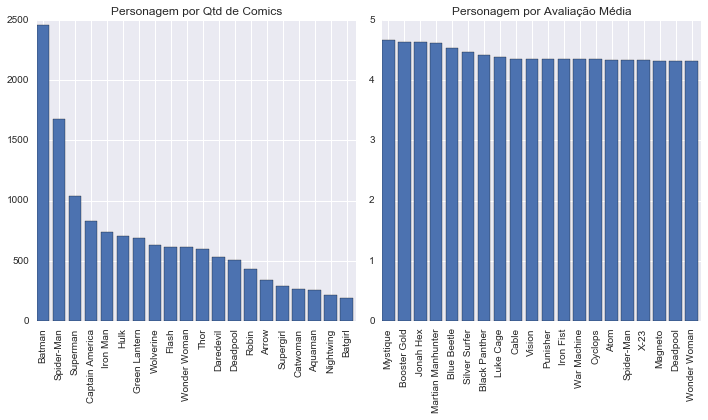

In [33]:
plt.figure(3,figsize=(10, 6))

plt.subplot(121) # Personagem por quantidade de comics
y_axis = top_characters_by_quantity['Quantity_of_comics']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_characters_by_quantity['Character_Name']), 
                             rotation=90)
plt.title('Personagem por Qtd de Comics')
plt.tight_layout()

plt.subplot(122) # Personagem por avaliação média
y_axis = top_characters_by_rating['Average_Rating']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_characters_by_rating['Character_Name']), 
                             rotation=90)
plt.title('Personagem por Avaliação Média')
plt.tight_layout()

plt.show()

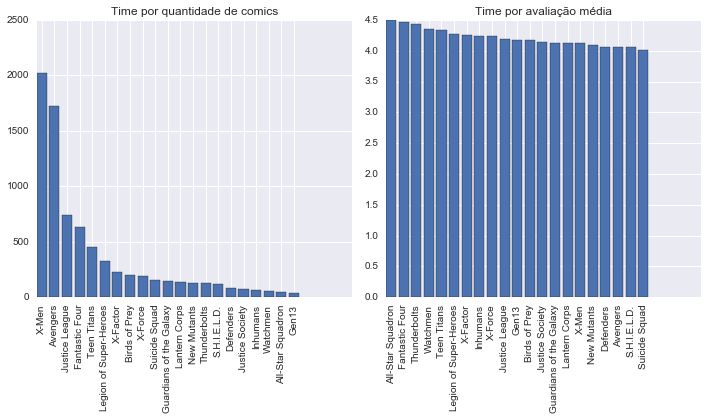

In [34]:
plt.figure(4,figsize=(10, 6))

plt.subplot(121) # Time por quantidade de comics
y_axis = top_teams_by_quantity['Quantity_of_comics']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_teams_by_quantity['Team_Name']), rotation=90)
plt.title('Time por quantidade de comics')
plt.tight_layout()

plt.subplot(122) # Time por avaliação média
y_axis = top_teams_by_rating['Average_Rating']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_teams_by_rating['Team_Name']), rotation=90)
plt.title('Time por avaliação média')
plt.tight_layout()

plt.show()

## Conclusão

Com isto, encerra-se a nossa série de 3 posts sobre [análise do site](http://felipegalvao.com.br/blog/2016/05/01/comixology-analise-de-quadrinhos-digitais-parte-1-analise-do-site-para-web-scraping/), [web scraping](http://felipegalvao.com.br/blog/2016/05/24/web-scraping-com-python-comics-digitais-do-comixology/) e [análise de dados de comics digitais](http://felipegalvao.com.br/blog/2016/06/01/analise-de-comics-digitais-python-marvel-ou-dc), com informações extraídas do site da [Comixology](https://www.comixology.com/). Como nem sempre os dados estão disponíveis de uma forma simples e prática, como um banco de dados ou um dataset em csv, podemos ter que buscar os dados através de web scraping, varrendo links em busca das informações que queremos.

Aqui nesta análise, chegamos a conclusão relativas aos comics presentes no site, na visão de seus usuários. Um resumo das conclusões está na lista abaixo:

* Alguns publishers menores possuem avaliações médias altas, sendo uma boa opção de leitura se você quer fugir das tradicionais Marvel e DC Comics
* Entre as gigantes (publishers com mais de 300 comics que receberam alguma avaliação no site), a Marvel e a DC Comics ficam na parte debaixo da lista com relação à avaliações médias. As três primeiras são Archie (do comic de mesmo nome, Mega Man, Sonic, entre outros), MAX (focada em comics mais adultos: Dexter, Jessica Jones, Deadpool) e Image - Skybound (principalmente Walking Dead)
* Classificação Etária não parece fazer muita diferença na avaliação que um comic recebe
* O lançamento de comics aumentou muito na década de 2000, sofreu uma queda recentemente e agora parece estar novamente aumentando
* Os dois comics com mais avaliações no site são gratuitos. O terceiro, surpreendentemente, é a primeira edição da série Saga, da publisher Image
* Na batalha particular entre Marvel e DC Comics, a DC parece levar pequena vantagem. Ela possui um preço médio e preço por página menor, enquanto possui uma avaliação média levemente maior. A quantidade média de páginas nos comics da Marvel é um pouco maior. A DC também possui uma proporção maior de comics bons (4 ou 5 estrelas) e uma proporção menor de comics ruins (1 ou 2 estrelas).
* O Batman é o personagem com mais comics, seguido do Homem-Aranha e Superman. Os heróis com maior avaliação média são, surpreendentemente, Mística (dos X-Men), Booster Gold e Jonah Hex.
* Entre os times, os que mais possuem comics são os X-Men, Vingadores e a Liga da Justiça. No pódio dos mais bem avaliados estão o All-Star Squadron da DC, Quarteto Fantástico e os Thunderbolts, da Marvel.

E assim terminamos nosso pequeno projeto. Espero que tenham gostado :)

Abraços